In [1]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

In [3]:
iris_df = pd.read_csv("iris.csv")

In [4]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
import seaborn as sns

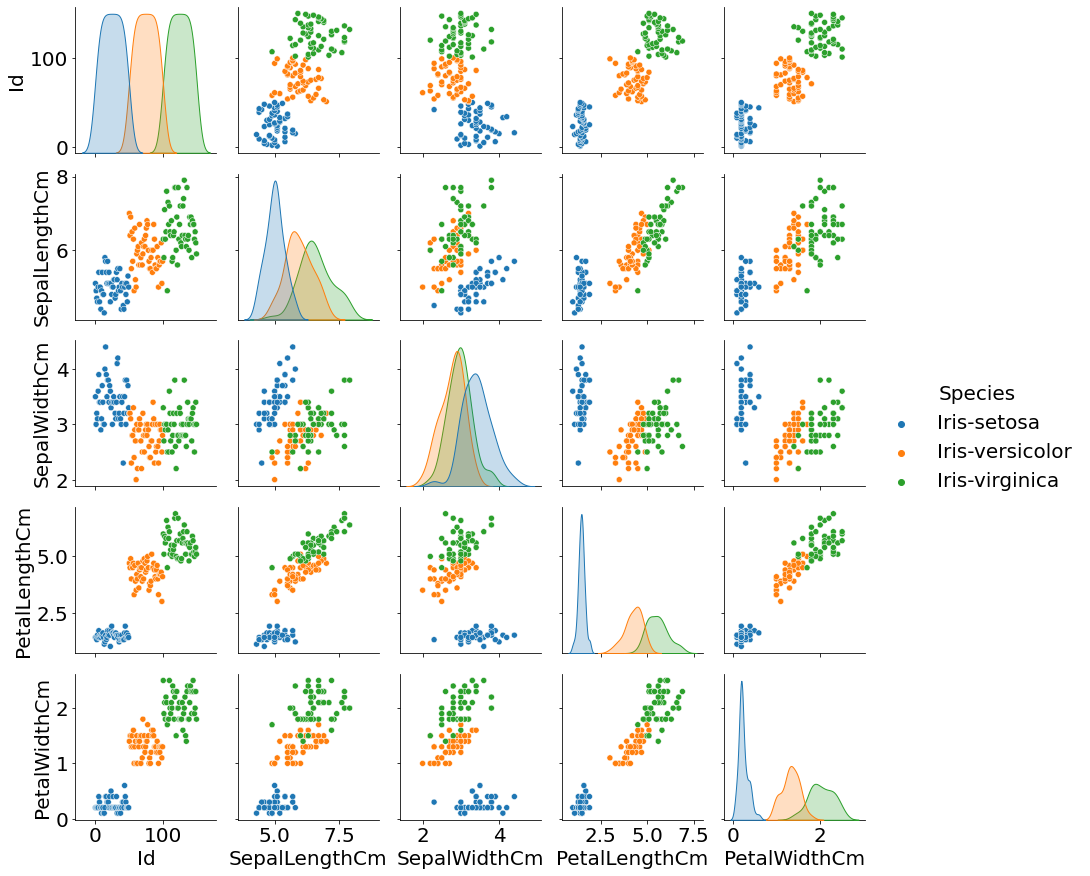

In [6]:
sns.pairplot(iris_df, diag_kind='kde', hue='Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

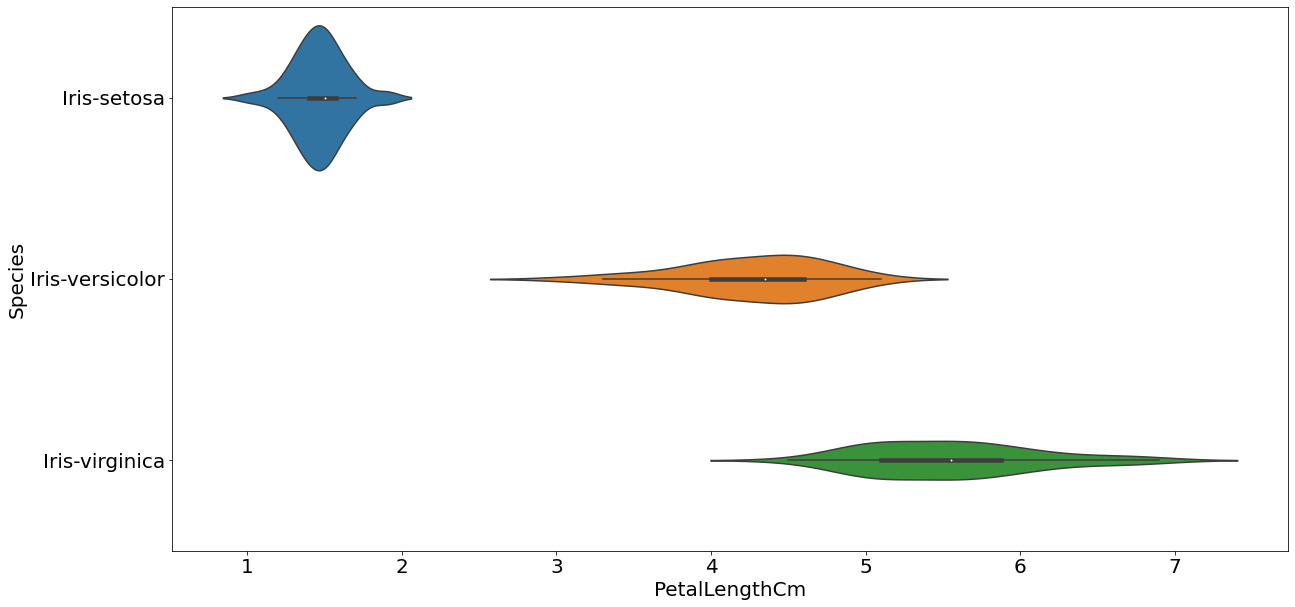

In [7]:
sns.violinplot(data=iris_df, x="PetalLengthCm", y="Species")

<AxesSubplot:>

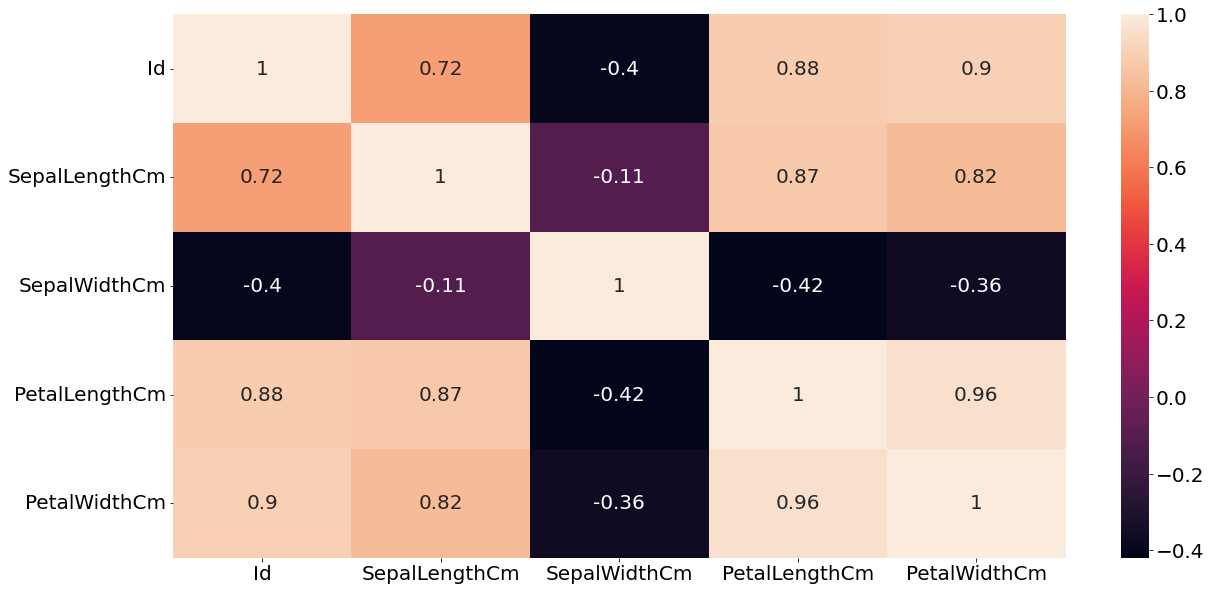

In [8]:
correlation_matrix = iris_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Data with extra column of (PetalLengthCm X PetalWidthCm)

In [9]:
iris_df_with_col = iris_df.copy()

iris_df_with_col["petal_size"] = iris_df_with_col["PetalLengthCm"]*iris_df_with_col["PetalWidthCm"]
iris_df_with_col.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,petal_size
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.28


<AxesSubplot:>

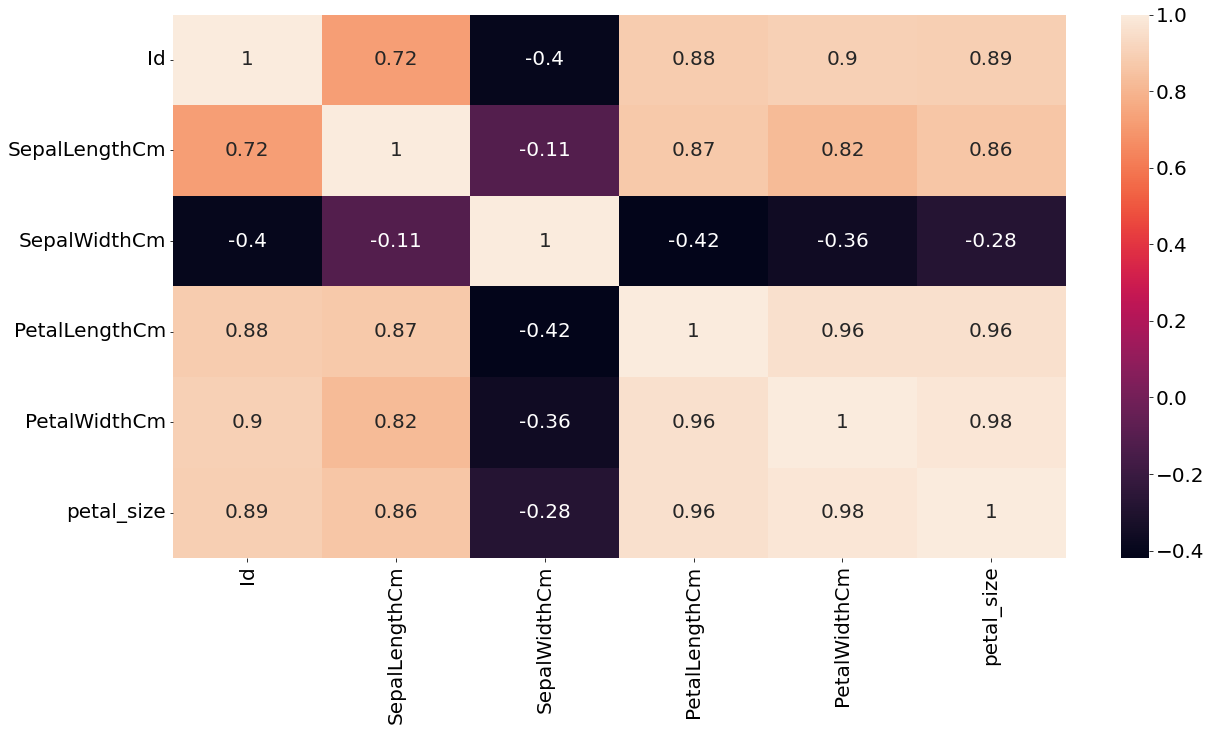

In [10]:
correlation_matrix = iris_df_with_col.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

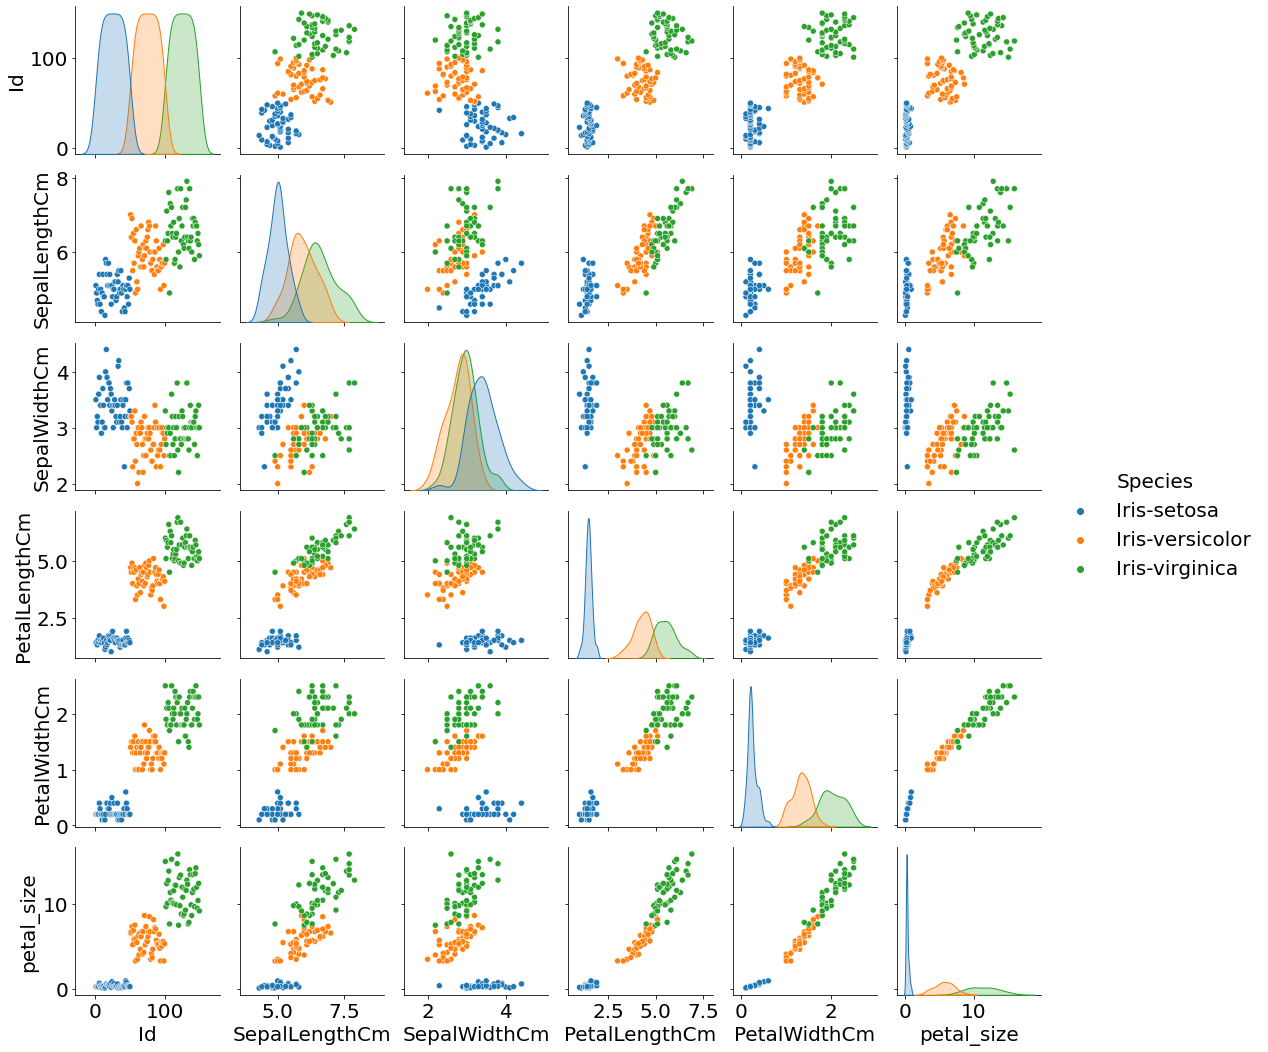

In [11]:
sns.pairplot(iris_df_with_col, diag_kind='kde', hue='Species')

# Prepering Data for fitting:

In [12]:
X = iris_df.iloc[:, [0,1,2, 3]].values
y = iris_df.iloc[:, 4].values
y=y.astype('int')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Logistic Regression to the Training set
### create the SGDClassifier and predict the probabilities of the train and test data. Pipeline the preprocessing (standatization), and the classification, defining the parameters:  loss='log', alpha=0, learning_rate='constant', eta0=0.01.

### simple example:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

iris example: https://medium.com/@kgpvijaybg/logistic-regression-on-iris-dataset-48b2ecdfb6d3

In [27]:
#import numpy as np
#from sklearn.linear_model import SGDClassifier

#from sklearn.pipeline import make_pipeline
#X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
#Y = np.array([1, 1, 2, 2])
# Always scale the input. The most convenient way is to use a pipeline.
#clf = make_pipeline(StandardScaler(),
#                    SGDClassifier(max_iter=1000, tol=1e-3))
#clf.fit(X, Y)

#print(clf.predict([[-0.8, -1]]))

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(),SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant',
                               loss='log'))])

In [14]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Predict probabilities
probs_y=model.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 1          | 0.01       | 0.8           | 0.19      
1          | 1          | 0.01       | 0.97          | 0.01      
0          | 0          | 0.94       | 0.0           | 0.06      
1          | 1          | 0.0        | 0.52          | 0.48      
0          | 0          | 0.92       | 0.08          | 0.0       
2          | 2          | 0.01       | 0.41          | 0.58      
0          | 0          | 0.95       | 0.04          | 0.01      
1          | 1          | 0.03       | 0.55          | 0.42      
1          | 1          | 0.01       | 0.79          | 0.2       
1          | 1          | 0.08       | 0.85          | 0.07      
1          | 1          | 0.0        | 0.74          | 0.25      
1          | 1          | 0.23       | 0.56          | 0.21      
1          | 1          | 0.03       | 0.87          | 0.1       
1       

https://www.turing.com/kb/how-to-plot-confusion-matrix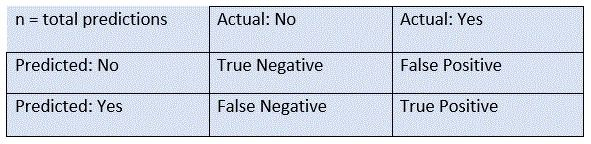

confusion matrix
There are four potential outcomes:

1. True positive
2. True negative
3. False positive
4. False negative

True positive (TP) is the number of true=**correct** results when the actual=**real observation is positive**.

False positive (FP) is the number of **incorrect** predictions when the actual**real observation is positive**.

True negative (TN) is the number of true=**correct** predictions when the **real observation is negative**.

False negative (FN) is the number of **incorrect** predictions when the **real observation is negative**.

### Precision
Precision is the analysis of the **true positives (correct) over the number of total (real) positives** that are predicted by the machine learning model. The formula for precision is written as **TP/(TP+FP)**. This indicator allows you to calculate the rate at which your positive predictions are actually positive.

**Correct Positives/All Positives**

### Accuracy
Accuracy is the most commonly used parameter that is employed to judge the machine learning model. For example, if 70% of cases are false and only 30% are true then there is a high possibility of the ML model having an accuracy score of 70%. The formula to calculate accuracy is **(TP+TN)/(TP+FP+FN+TN)**

**Correct/All**

### Recall
*Sensitivity* or *recall* is the measure of the TP over the count of the actual positive outcomes. The formula to calculate Recall is TP/(TP+FN). This parameter assesses how well the ML model can analyze the input and identify the actual result.

**Correct Positives/All Predicted Positives**

### F1 score
The harmonic mean of precision and recall is the F1 score. It is used as an overall indicator that **incorporates both precision and recall**. This harmonic mean analyzes both false positives and false negatives and performs well on an imbalanced dataset. The formula to calculate it is 2(p*r)/(p+r), where r is the recall and p is precision.

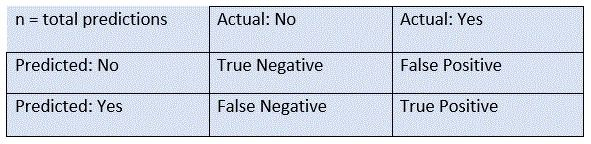

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)

[[11  0  0]
 [ 0 16  0]
 [ 0  2  1]]


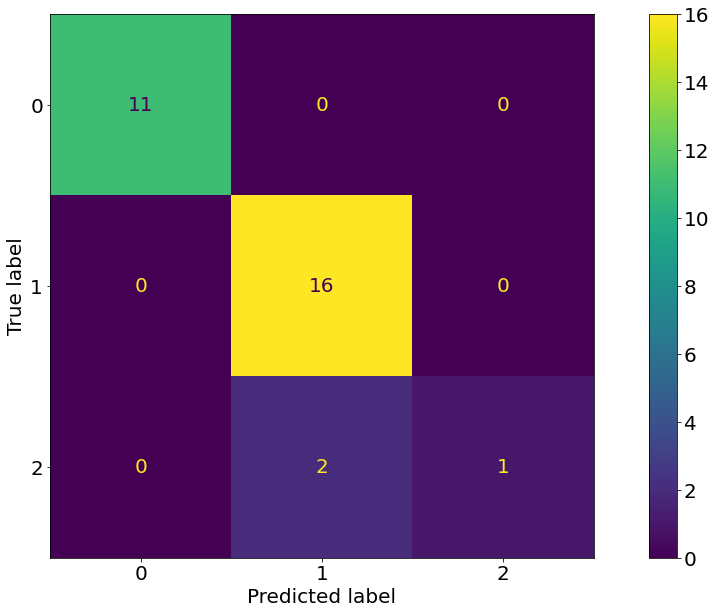

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()

## The score function in Scikit-learn SGDClassifier is the mean accuracy for each label

In [17]:
model.score(X, y, sample_weight=None)

0.9

# Same process with extra column

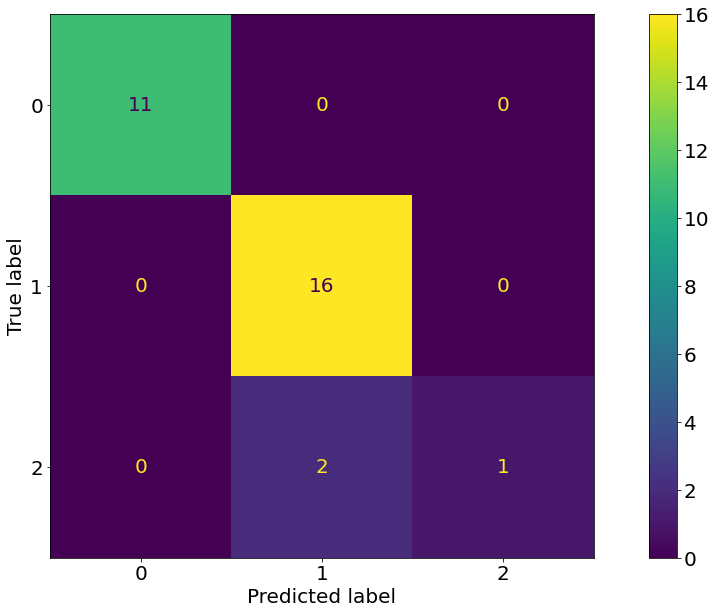

In [18]:
X = iris_df_with_col.iloc[:, [0,1,2, 3]].values
y = iris_df_with_col.iloc[:, 4].values
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

model = make_pipeline(StandardScaler(),SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()

In [19]:
model.score(X, y, sample_weight=None)

0.9

# Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(max_iter=3000).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

0.9333333333333333

## Or Better...

In [21]:
#Neural network module
from keras.layers import Dense,Activation,Dropout 
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [22]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [23]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 1s 56ms/step - loss: 3.3879 - accuracy: 0.4083 - val_loss: 2.1127 - val_accuracy: 0.1667
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 1.6480 - accuracy: 0.4750 - val_loss: 0.6702 - val_accuracy: 0.7667
Epoch 3/10
6/6 [==============================] - 0s 11ms/step - loss: 1.3088 - accuracy: 0.5583 - val_loss: 0.5721 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 1.1311 - accuracy: 0.6083 - val_loss: 1.0035 - val_accuracy: 0.4333
Epoch 5/10
6/6 [==============================] - 0s 10ms/step - loss: 0.8966 - accuracy: 0.6333 - val_loss: 0.4909 - val_accuracy: 0.8333
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 1.0070 - accuracy: 0.5667 - val_loss: 0.6002 - val_accuracy: 0.8333
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 1.0604 - accuracy: 0.6333 - val_loss: 0.6562 - val_accuracy: 0.4667
Epoch 8/10
6/6 [===========

In [26]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

1/1 [==============================] - 0s 120ms/step
Accuracy of the dataset 70.0
